# Intro

#### Objective: 
The goal of this project was to use simple linear regression to predict one body part of a possum based on another.

In this project I will do simple linear regression using the [possum](https://www.kaggle.com/datasets/abrambeyer/openintro-possum) dataset from Kaggle. 

I use numpy, pandas, matplotlib, and seaborn.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns

# Studying and Filtering Data

In [34]:
#First we will load in the the possum dataset

possum=pd.read_csv('possum.csv')
possum

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


*Column Descriptions* [Data](https://www.kaggle.com/datasets/abrambeyer/openintro-possum)
1. **case** - number of each individual possum
2. **site** - site number of possum trapped
3. **Pop** - Population, Victoria and New South Wales/Queensland
4. **sex** - gender of possum
5. **age** - age of possum
6. **hdlngth** - possum head length (mm)
7. **skullw** - possum skull length (mm)
8. **totlngth** - possum total length (cm)
9. **taill** - possum tail length (cm)
10. **footlgth** - possum foot length
11. **earconch** - possum ear conch length
12. **eye** - distance from medial canthus to lateral canthus of right eye
13. **chest** - possum chest girth (cm)
14. **belly** - possum belly girth (cm)

In [35]:
#We will filter out by population and only choose the possums in Victoria

newpossum=possum.loc[possum['Pop']=='Vic']

# Correlation

In [36]:
#Correlation between the different columns

correlations=newpossum.corr()
correlations

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.780071,-0.344732,-0.560139,-0.451699,-0.669718,-0.434637,-0.389208,-0.258191,-0.341417,-0.565477,-0.352325
site,0.780071,1.000000,-0.132264,-0.663575,-0.341150,-0.746195,-0.416338,-0.389136,-0.271089,-0.314176,-0.363697,-0.352899
age,-0.344732,-0.132264,1.000000,0.266057,0.254021,0.303023,0.334405,0.235229,-0.056632,0.434202,0.225833,0.384885
hdlngth,-0.560139,-0.663575,0.266057,1.000000,0.610597,0.820165,0.473034,0.599618,0.303952,0.517976,0.569748,0.659423
skullw,-0.451699,-0.341150,0.254021,0.610597,1.000000,0.508990,0.354483,0.375488,0.075204,0.354843,0.511941,0.453738
totlngth,-0.669718,-0.746195,0.303023,0.820165,0.508990,1.000000,0.701798,0.607266,0.210760,0.343135,0.553786,0.572191
taill,-0.434637,-0.416338,0.334405,0.473034,0.354483,0.701798,1.000000,0.558403,0.050172,0.318711,0.368073,0.363663
footlgth,-0.389208,-0.389136,0.235229,0.599618,0.375488,0.607266,0.558403,1.000000,0.236406,0.223866,0.407828,0.424997
earconch,-0.258191,-0.271089,-0.056632,0.303952,0.075204,0.210760,0.050172,0.236406,1.000000,-0.055564,0.146742,0.210477
eye,-0.341417,-0.314176,0.434202,0.517976,0.354843,0.343135,0.318711,0.223866,-0.055564,1.000000,0.215982,0.347330


<AxesSubplot:>

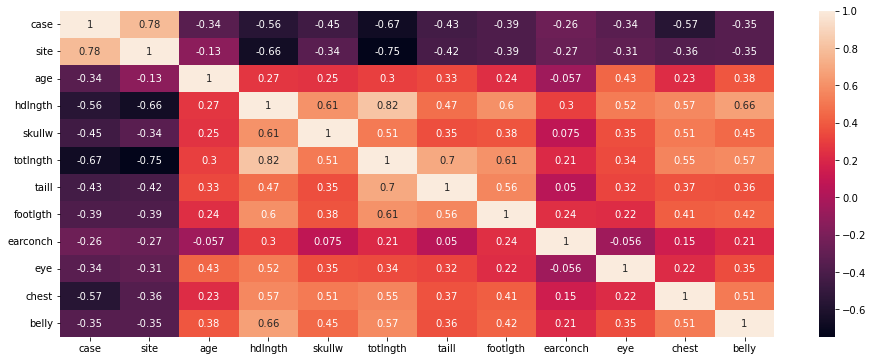

In [37]:
#Heatmap of correlations

plt.figure(figsize=(16,6))
sns.heatmap(newpossum.corr(),annot=True)

### Objective Specified

For this linear regression, foot length and head length will be chosen. I will be using simple linear regression to determine whether we can predict the head length using the foot length

In [38]:
# ignored a warning that I deemed unnecessary
import warnings
warnings.filterwarnings('ignore')

In [39]:
#Cleaning table(row 40 had a missing value for footlength)

newpossum=newpossum.drop([40])

# Linear Regression

Text(0.5, 1.0, 'Scatter plot of possum foot length and head length')

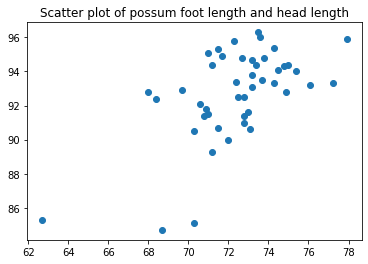

In [44]:
#Scatter plot of foot length vs head length

plt.scatter(newpossum['footlgth'],newpossum['hdlngth'])
plt.title('Scatter plot of possum foot length and head length')


In [45]:
#We need our coefficient constant, which we will call "r"

r=correlations.loc['hdlngth','footlgth']
r

0.5996175738596475

In [46]:
#The correaltion between head length and foot length, r, is a positive one.

#The formula for linear regression is the known x variable multiplied by the slope of the regression, plus the intercept
#Since we are trying to find the head length, we will use the foot length as our known x variable.

#This means we need to find the slope of the regression line and intercept

In [47]:
#We will make a function to find the slope of the regression line
#Slope= correlation * (Standard Deviation Y)/(Standard Deviation X)

def slope(df, y, x):
    return r*(np.std(df[y])/np.std(df[x]))

slope(newpossum,'hdlngth','footlgth')

0.6246864453506085

In [48]:
#We have our slope. Now we need our intercept
#Intercept= Y average - slope*X average

def intercept(df, y, x):
    return np.average(df[y])-(slope(df,y,x)*np.average(df[x]))

intercept(newpossum,'hdlngth','footlgth')

47.465200659827815

In [49]:
#We have our slope, intercept, and independent x variable. Now we just need to plug it into the regression equation
#Below is a function for the regression equation. After inputed, we have our predictions, which is put on a table

def estimate_y(df, y, x):
    return slope(df, y, x)*df[x]+intercept(df, y, x)

possum_estimate=estimate_y(newpossum,'hdlngth','footlgth')
reg_possum=newpossum[['hdlngth','footlgth']]
reg_possum['predicted hdlngth']=possum_estimate
reg_possum

,hdlngth,footlgth,predicted hdlngth
0,94.1,74.5,94.004341
1,92.5,72.5,92.754968
2,94.0,75.4,94.566559
3,93.2,76.1,95.003839
4,91.5,71.0,91.817938
5,93.1,73.2,93.192248
6,95.3,71.5,92.130282
7,94.8,72.7,92.879905
8,93.4,72.4,92.692499
9,91.8,70.9,91.755470


<function matplotlib.pyplot.show(close=None, block=None)>

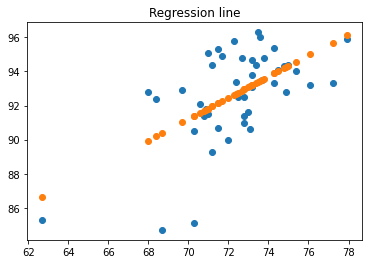

In [50]:
#Scatter plot of foot length vs head length with regression line

plt.scatter(newpossum['footlgth'],newpossum['hdlngth'])
plt.scatter(reg_possum['footlgth'],reg_possum['predicted hdlngth'])
plt.title('Regression line')

plt.show

# Checking for Errors (RMSE)

In [51]:
#Next we will compute a root mean squared deviation to look for any errors made during the regression line
#RMSE-Root Mean Squared Deviation 
#RMSE is equal to Standard Deviation of residuals (actual values distance from the regression line)

#RMSE=Square Root(Mean of [(Actual values - Predicted Values)^2])


#Calculation for RMSE
actual=reg_possum['hdlngth']
prediction=reg_possum['predicted hdlngth']
residuals=(actual-prediction)
squared=residuals**2
meanz=np.mean(squared)
np.sqrt(meanz)

2.1289445541184238

In [52]:
#Another easier way to do RMSE

rmse=np.std(residuals)
rmse

2.1289445541184238

In [53]:
#Just for clarity we'll look at a table with the residuals

reg_possum['residuals']=residuals
reg_possum

,hdlngth,footlgth,predicted hdlngth,residuals
0,94.1,74.5,94.004341,0.095659
1,92.5,72.5,92.754968,-0.254968
2,94.0,75.4,94.566559,-0.566559
3,93.2,76.1,95.003839,-1.803839
4,91.5,71.0,91.817938,-0.317938
5,93.1,73.2,93.192248,-0.092248
6,95.3,71.5,92.130282,3.169718
7,94.8,72.7,92.879905,1.920095
8,93.4,72.4,92.692499,0.707501
9,91.8,70.9,91.755470,0.044530


In [54]:
#With this new table including residuals, we can see the difference between the head length and predicted head length

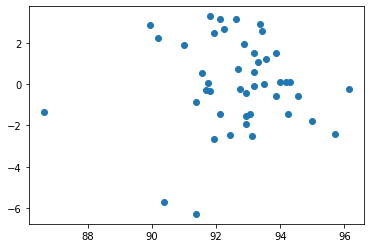

In [55]:
plt.scatter(reg_possum['predicted hdlngth'],reg_possum['residuals'])

In [56]:
reg_possum['predicted hdlngth'].max()

96.12827475264021

In [57]:
reg_possum['predicted hdlngth'].min()

86.63304078331097

# Conclusion

Conclusion and Interpretation:

**Linear Regression Scatter Plot**: Through the Linear Regression scatter plot, we can clearly see that the regression produced a straight line of predicted head lengths. This is what we desired. THe line is an estimate or prediction of head length based on the known foot lengths

**RMSE**: The RMSE for this problem was 2.1289. Since our maximum predicted head length is roughly 96 and our minimum is roughly 87, my interpretation of this is that this was a decent linear regression. Had the RMSE been less than 2.1289, it would have been better but 2.1289 will suffice

**Residual Scatter Plot**: In the residual scatter plot, we can see that most values lie around the 0 value of the Y axis. This is ideal and what we desire, because the closer to the zero the data points are, the more accurate the prediction is. For the values above the zero this means the prediction was too low, and for the values below the zero, this means the prediction was too high. We can also note that 2 odd values are well away from the zero, at roughly -6, which means for these two values, the prediction was poor and incorrect.

**What may have gone wrong**:
-When looking at the original scatter plot of possum foot length vs head length, we notice that three data points are very different compared to the other points. These are outliers and differ greatly than the other points. Had the dataset not containted these three points, the regression may have been better
-Moreover, we can see via the scatter plot including the regression line that the two lowest value were very far from the regression line prediction. These two values are also the two odd residuals discussed earlier.
-Another error could be that [independent variables aren't perfect in determining dependent variables](https://hbr.org/2015/11/a-refresher-on-regression-analysis#:~:text=A%20regression%20line%20always%20has,can%20be%20about%20the%20formula.). In this regression project, foot length and head length may be correlated, but there are other factors as well, such as the possums' gender, nutrition, genetics, skull length, etc.